<a href="https://colab.research.google.com/github/adityachoudharyclg/pytorchBasics/blob/master/Linear_regression_using_pytorch_practice_2_imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_boston,load_diabetes
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt


In [0]:
class LinearRegression:
  def __init__(self,data,learning_rate=1e-7,num_epochs=1000):
    self.data=data
    self.inputs=None
    self.targets=None
    self.learning_rate=learning_rate
    self.errors=[]
    self.weights=None
    self.bias=None
    self.num_epochs=num_epochs
    self.dataPreprocessing()
  
  def dataPreprocessing(self,batch_size=50):
    self.inputs,self.targets=self.data
    if len(self.targets.shape)<=1:
      self.targets=self.targets.reshape((self.targets.shape[0],1))
    self.inputs=torch.from_numpy(self.inputs)
    self.targets=torch.from_numpy(self.targets)
    self.train_ds=TensorDataset(self.inputs,self.targets)
    self.train_dl=DataLoader(self.train_ds,batch_size=batch_size,shuffle=True)
    # for xb, yb in self.train_dl:
    #   print(xb)
    #   print(yb)
    #   break

  def modelInit(self):
    self.model=nn.Linear(self.inputs.shape[1],self.targets.shape[1])
    self.weights=model.weights
    self.bias=model.bias
  
  def predictions(self):
    self.preds=self.model(self.inputs.float())
    return self.preds
  
  def lossFunc(self):
    self.loss_func=F.mse_loss
    loss=self.loss_func(self.predictions(),self.targets.float())
    return loss
  
  def optimizer(self):
    self.opt=torch.optim.SGD(self.model.parameters(), lr=self.learning_rate)

  def fit(self):
    self.modelInit()
    self.optimizer()
    # Repeat for given number of epochs
    for epoch in range(self.num_epochs):
        
        # Train with batches of data
        for xb,yb in self.train_dl:
            
            # 1. Generate predictions
            pred = self.predictions()
            
            # 2. Calculate loss
            loss = self.lossFunc()
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            self.opt.step()
            
            # 5. Reset the gradients to zero
            self.opt.zero_grad()
        
        # Print the progress
        self.errors.append(loss.item())
        if (epoch+1) % 100 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, self.num_epochs, loss.item()))
  
  def plotError(self):
    plt.plot(self.errors)
    plt.show()

  def saveModel(self):
    torch.save(self.model.state_dict(), 'model.ckpt')
  

Epoch [100/1000], Loss: 94.7276
Epoch [200/1000], Loss: 93.3852
Epoch [300/1000], Loss: 92.1522
Epoch [400/1000], Loss: 91.0127
Epoch [500/1000], Loss: 89.9552
Epoch [600/1000], Loss: 88.9700
Epoch [700/1000], Loss: 88.0488
Epoch [800/1000], Loss: 87.1839
Epoch [900/1000], Loss: 86.3692
Epoch [1000/1000], Loss: 85.5988


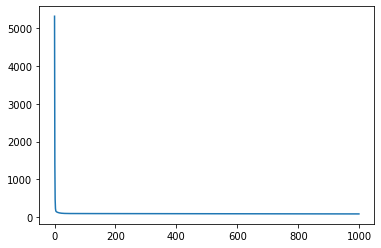

In [69]:
model=LinearRegression(load_boston(return_X_y=True))
model.fit()
model.plotError()

Epoch [100/5000], Loss: 6494.7573
Epoch [200/5000], Loss: 5811.3276
Epoch [300/5000], Loss: 5729.0293
Epoch [400/5000], Loss: 5664.9189
Epoch [500/5000], Loss: 5603.0688
Epoch [600/5000], Loss: 5542.9878
Epoch [700/5000], Loss: 5484.6147
Epoch [800/5000], Loss: 5427.8926
Epoch [900/5000], Loss: 5372.7715
Epoch [1000/5000], Loss: 5319.2002
Epoch [1100/5000], Loss: 5267.1313
Epoch [1200/5000], Loss: 5216.5220
Epoch [1300/5000], Loss: 5167.3237
Epoch [1400/5000], Loss: 5119.4893
Epoch [1500/5000], Loss: 5072.9858
Epoch [1600/5000], Loss: 5027.7637
Epoch [1700/5000], Loss: 4983.7881
Epoch [1800/5000], Loss: 4941.0200
Epoch [1900/5000], Loss: 4899.4224
Epoch [2000/5000], Loss: 4858.9575
Epoch [2100/5000], Loss: 4819.5923
Epoch [2200/5000], Loss: 4781.2925
Epoch [2300/5000], Loss: 4744.0283
Epoch [2400/5000], Loss: 4707.7637
Epoch [2500/5000], Loss: 4672.4702
Epoch [2600/5000], Loss: 4638.1182
Epoch [2700/5000], Loss: 4604.6807
Epoch [2800/5000], Loss: 4572.1270
Epoch [2900/5000], Loss: 4540

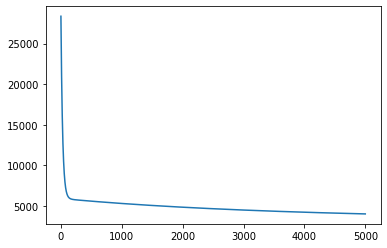

In [70]:
model=LinearRegression(load_diabetes(return_X_y=True),learning_rate=1e-3,num_epochs=5000)
model.fit()
model.plotError()

In [71]:
model.targets.shape

torch.Size([442, 1])

In [72]:
!ls

sample_data


In [0]:
model.saveModel()

In [74]:
!ls

model.ckpt  sample_data


In [0]:
from google.colab import files
files.download('model.ckpt')